In [2]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import cv2

import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()

'D:\\Works & Projects\\AI-ML\\Waste Dataset\\DATASET\\DATASET'

In [4]:
train_path="D:\Works & Projects\AI-ML\Waste Dataset\DATASET\DATASET\TRAIN"
test_path="D:\Works & Projects\AI-ML\Waste Dataset\DATASET\DATASET\TEST"

In [5]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#from keras.utils.vis_utils import plot_model
from glob import glob

In [6]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 813.15it/s]


In [7]:
data.shape

(22565, 2)

In [8]:
from collections import Counter
Counter(y_data)

Counter({'D:\\Works & Projects\\AI-ML\\Waste Dataset\\DATASET\\DATASET\\TRAIN\\O': 12565,
         'D:\\Works & Projects\\AI-ML\\Waste Dataset\\DATASET\\DATASET\\TRAIN\\R': 10000})

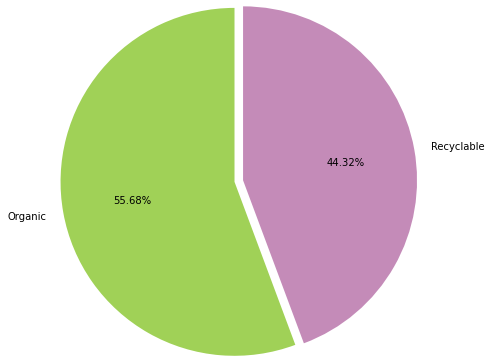

In [9]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

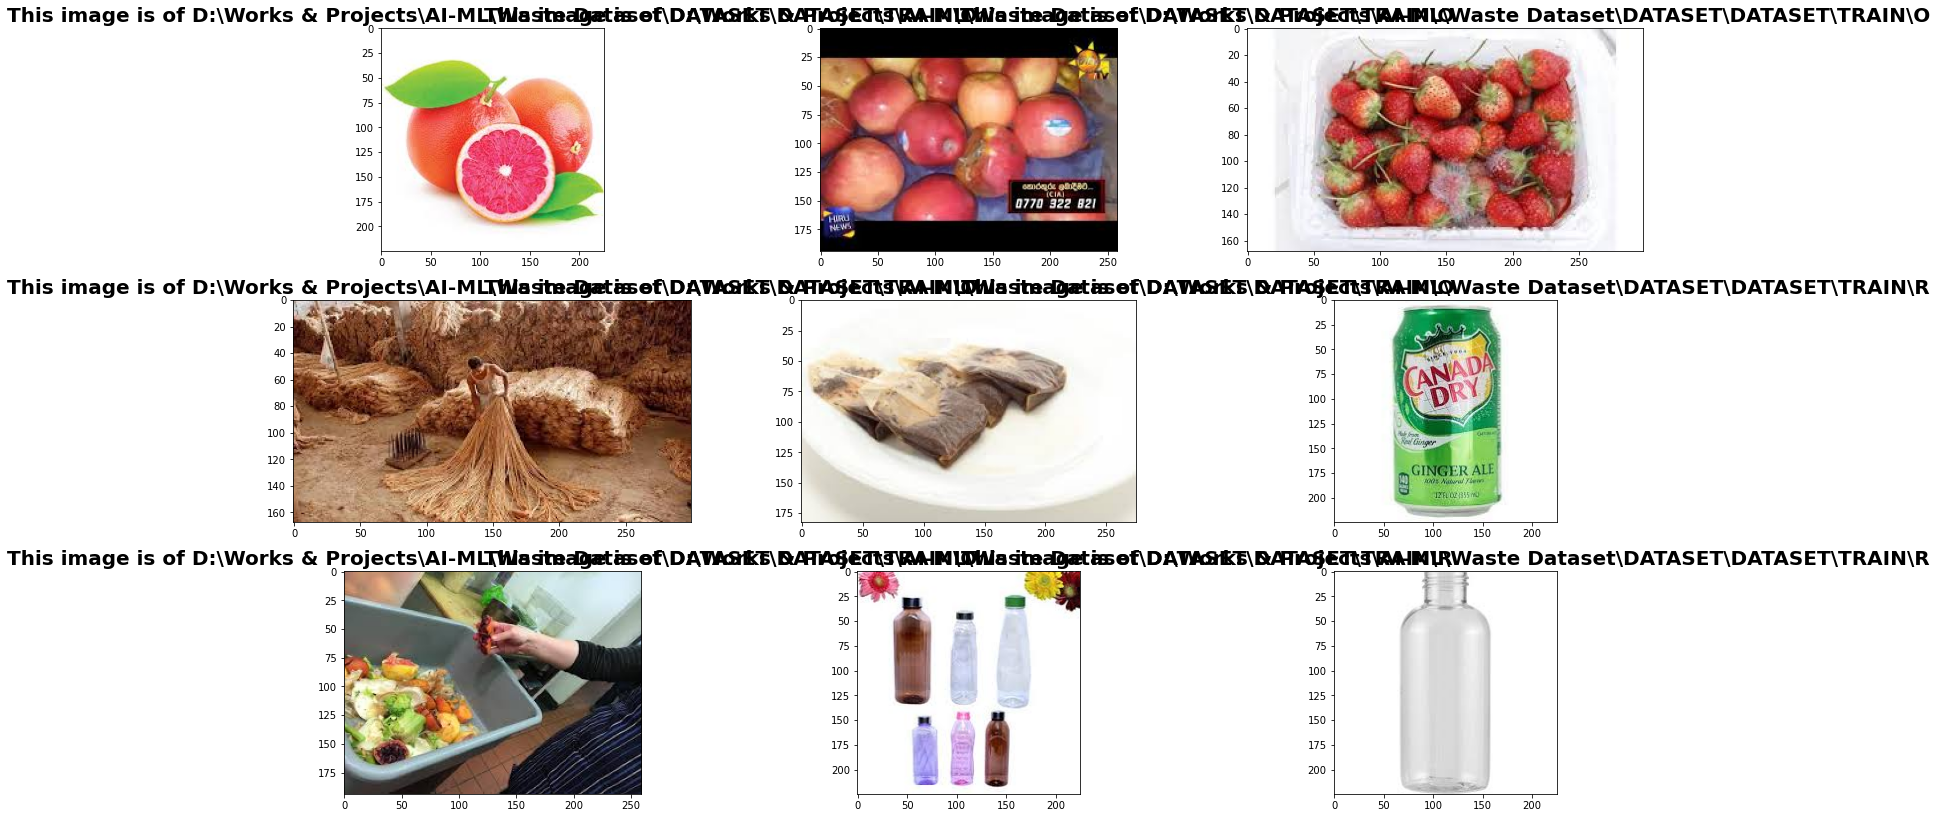

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [11]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [12]:
#CNN

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [13]:
#plot_model(model)

In [14]:
train_datagen= ImageDataGenerator(rescale= 1./255)
test_datagen= ImageDataGenerator(rescale= 1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22565 images belonging to 2 classes.
Found 2514 images belonging to 2 classes.


In [16]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=20,
        validation_data = test_generator)

Epoch 1/20


89/89 [==============================] - 416s 5s/step - loss: 0.5214 - accuracy: 0.7633 - val_loss: 0.3782 - val_accuracy: 0.8393
Epoch 2/20
89/89 [==============================] - 387s 4s/step - loss: 0.4116 - accuracy: 0.8291 - val_loss: 0.3235 - val_accuracy: 0.8807
Epoch 3/20
89/89 [==============================] - 378s 4s/step - loss: 0.3735 - accuracy: 0.8486 - val_loss: 0.3153 - val_accuracy: 0.8648
Epoch 4/20
89/89 [==============================] - 357s 4s/step - loss: 0.3401 - accuracy: 0.8646 - val_loss: 0.3367 - val_accuracy: 0.8520
Epoch 5/20
89/89 [==============================] - 364s 4s/step - loss: 0.3133 - accuracy: 0.8760 - val_loss: 0.3081 - val_accuracy: 0.8612
Epoch 6/20
89/89 [==============================] - 385s 4s/step - loss: 0.2958 - accuracy: 0.8812 - val_loss: 0.3010 - val_accuracy: 0.8735
Epoch 7/20
89/89 [==============================] - 363s 4s/step - loss: 0.2650 - accuracy: 0.8960 - val_loss: 0.2597 - val_accuracy: 0.8938
Epoch 8/20


KeyboardInterrupt: 

In [ ]:
import torch
torch.save(model,"D:\Works & Projects\AI-ML\Waste Dataset\DATASET\DATASET\model.pth")

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

In [ ]:
test_img = cv2.imread("D:\Works & Projects\AI-ML\Waste Dataset\DATASET\DATASET\TEST\O\O_12573.jpg")
predict_func(test_img)

In [ ]:
test_img = cv2.imread("D:\Works & Projects\AI-ML\Waste Dataset\DATASET\DATASET\TEST\R\R_10753.jpg")
predict_func(test_img)